In [1]:
import os

notebook_path = os.getcwd()
if notebook_path[-9:] == "notebooks":
    %cd ../../
os.getcwd()

D:\Sandbox\asteroid_trajectory_PINN


'D:\\Sandbox\\asteroid_trajectory_PINN'

##### This should be your project working directory.

##### <font color='red'>If the imports below are not working, it's likely because your working directory is wrong.</font>

In [2]:
from src import manipulate, scrape, tools, setup, plot

Collecting number of multiple observations made within 3 hrs of eachother to calculate distances.

In [3]:
plot.plot_hist()

In [4]:
import pickle
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
KeyError: '900'



In [34]:
with open("data/asteroid_data.pkl", "rb") as file:
    ast = pickle.load(file)
with open("data/ephemerides_data.pkl", "rb") as file:
    eph = pickle.load(file)

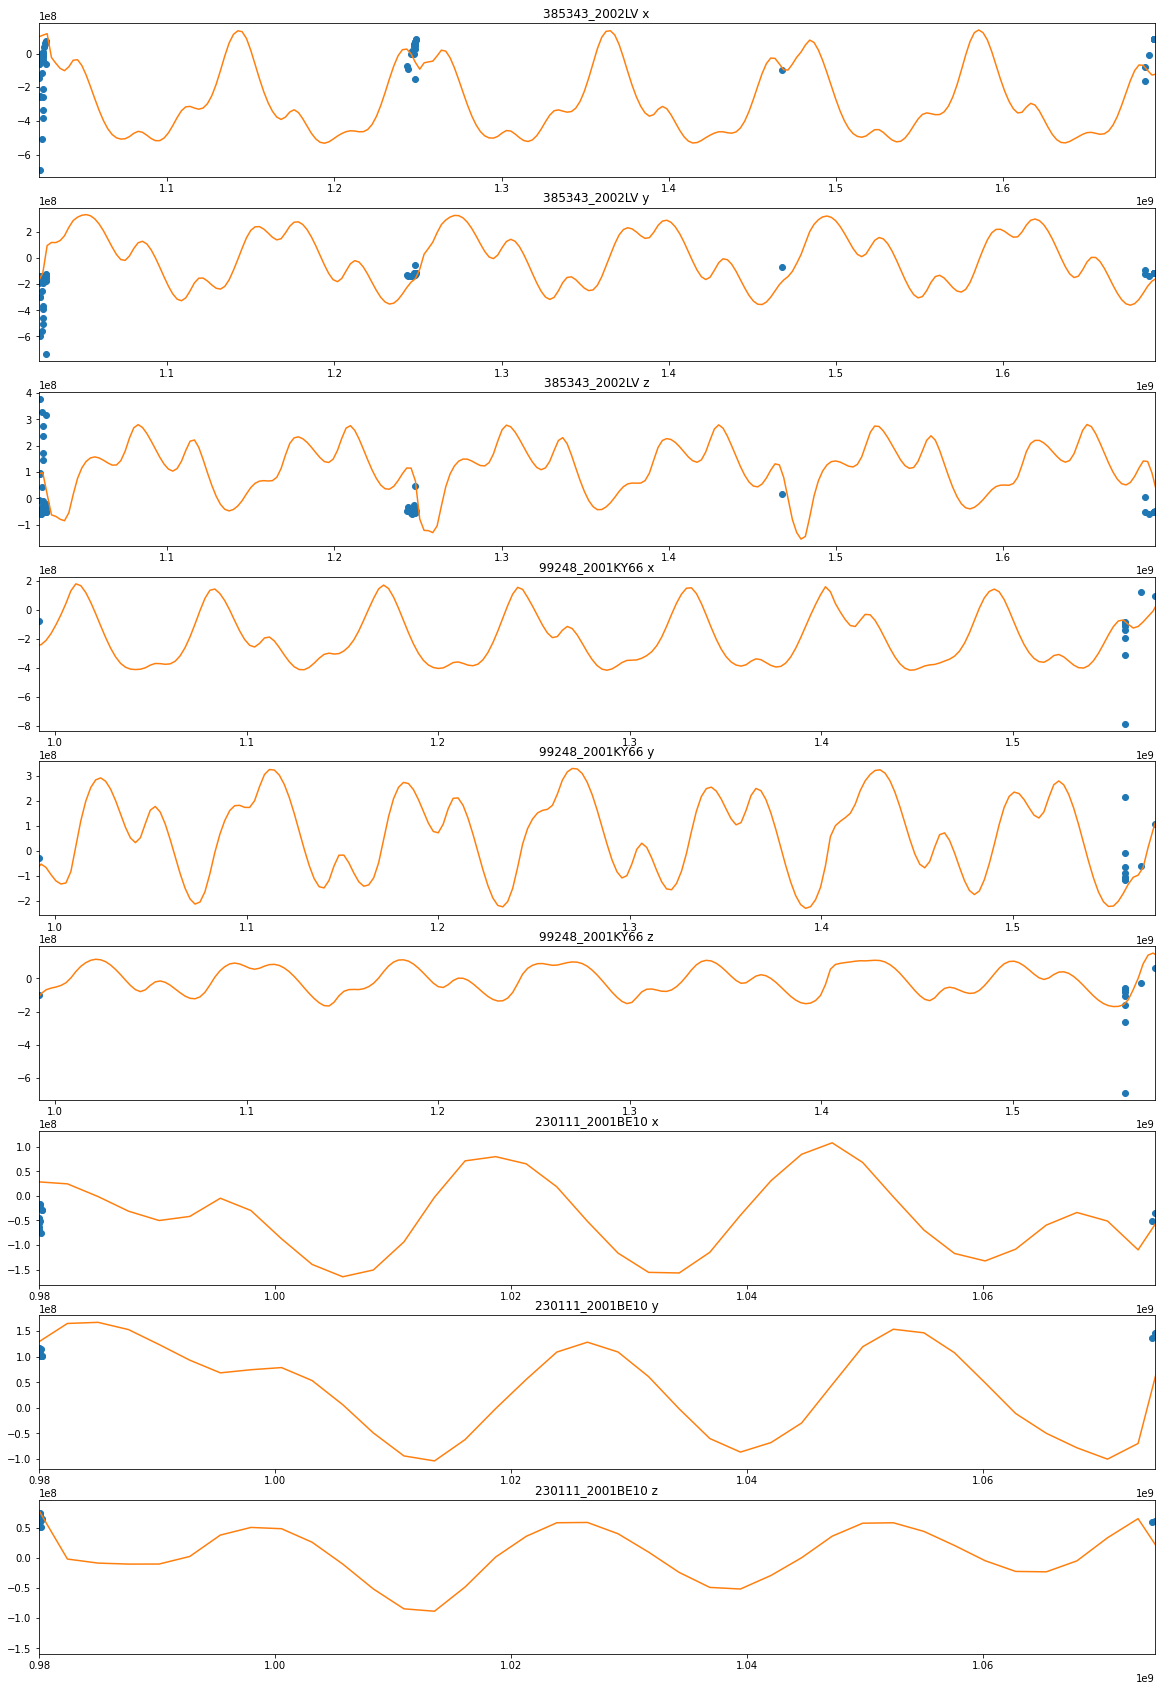

In [53]:
np.random.seed(7)
n = 3
fig, axs = plt.subplots(3*n, figsize=(20, 10*n))
with open("data/asteroid_data.pkl", "rb") as file:
    ast = pickle.load(file)
with open("data/ephemerides_data.pkl", "rb") as file:
    eph = pickle.load(file)
keys = np.random.choice(list(ast.keys()), n)
for i, key in enumerate(keys):
    x1, y1, z1, time1 = np.asarray(ast[key]).T
    x2, y2, z2, time2 = np.asarray(eph[key]).T
    time2 = [datetime.datetime.timestamp(t) for t in time2]

    axs[i*3].scatter(time1, x1, c="tab:blue")
    axs[i*3].plot(time2, x2, c="tab:orange")
    axs[i*3].title.set_text(f'{key} x')
    axs[i*3].set_xlim(min(time1), max(time1))
    
    axs[i*3+1].scatter(time1, y1, c="tab:blue")
    axs[i*3+1].plot(time2, y2, c="tab:orange")
    axs[i*3+1].title.set_text(f'{key} y')
    axs[i*3+1].set_xlim(min(time1), max(time1))

    axs[i*3+2].scatter(time1, z1, c="tab:blue")
    axs[i*3+2].plot(time2, z2, c="tab:orange")
    axs[i*3+2].title.set_text(f'{key} z')
    axs[i*3+2].set_xlim(min(time1), max(time1))
plt.show()

In [37]:
x = np.append(x1, x2)/1E9
y = np.append(y1, y2)/1E9
z = np.append(z1, z2)/1E9
color = ['a' for ele in x1] + ['b' for ele in x2]
df = pd.DataFrame(dict(X=x, Y=y, Z=z, color=color))

In [38]:
import plotly.graph_objects as go
import plotly.express as px

fig = px.line_3d(df, x='X', y='Y', z='Z', color="color")
fig.update_layout(
    width=800,
    height=700)
fig.show()